# Análisis exploratorio y Limpieza

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.preprocessing import OneHotEncoder
import re 

In [14]:
df10 = pd.read_csv("/home/adalaber/Escritorio/GIT_PROY2/input/data.csv" , index_col= 0)
df10.head(2)

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
index,,,,,,,,,,,,,,,,,
0,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df10.describe()

,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER
count,9507,9792,1062,209,1770,175,1067,753,348,2051,1794,590,251,260,147,7174,737
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,None,Other
freq,9507,9792,1062,209,1770,175,1067,753,348,2051,1794,590,251,260,147,7174,737


In [16]:
#VALORES ÚNICOS
for col in df10:
    print(df10[col].unique())

[nan ' Kaggle Notebooks']
['Colab Notebooks' nan]
[nan 'Azure Notebooks']
[nan ' Paperspace / Gradient ']
[nan ' Binder / JupyterHub ']
[nan ' Code Ocean ']
[nan ' IBM Watson Studio ']
[nan ' Amazon Sagemaker Studio Notebooks ']
[nan ' Amazon EMR Notebooks ']
[nan 'Google Cloud Notebooks (AI Platform / Vertex AI) ']
[nan 'Google Cloud Datalab']
[nan ' Databricks Collaborative Notebooks ']
[nan ' Zeppelin / Zepl Notebooks ']
[nan ' Deepnote Notebooks ']
[nan ' Observable Notebooks ']
[nan 'None']
[nan 'Other']


In [17]:
#PORCENTAJE DE NULOS
for col in df10:
    try: 
        print(df10[col].isnull().sum() / df10.shape[0] * 100)
    except:
        print("No puedo")

63.39660416586456
62.2993108227775
95.91113848997036
99.19531821506949
93.18523081661726
99.32622338582374
95.89188772956531
97.10083548300157
98.66014707580949
92.10333808185423
93.09282716667309
97.72841027220576
99.03361182766719
98.99896045893813
99.43402764409194
72.37900897085436
97.16243791629769


- Con .describe() y los valores únicos, comprobamos que cada una de las columnas de Q10 corresponde a un desglose tipo encoding de Q10, donde cada una de las columnas corresponde a una herramienta de "notebook" usada por las personas encuestadas.

- Al investigar los valores nulos, vemos que representan un % enorme de cada subcolumna.

- En este sentido, la forma más sencilla de extraer información es realizar un conteo de los valores no nulos de cada subcolumna (equiparables a un sí/no de si se usa o no esa herramienta para cada usuario/fila), y así comprobar en qué medida las personas utilizan unas y/u otras herramientas. 

In [18]:
lista = []
for col in df10:
    a = df10[col].value_counts()
    lista.append(a)

In [19]:
b = pd.DataFrame(lista)
b

,Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,None,Other
Q10_Part_1,9507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_2,NaN,9792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_3,NaN,NaN,1062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_4,NaN,NaN,NaN,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_5,NaN,NaN,NaN,NaN,1770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_6,NaN,NaN,NaN,NaN,NaN,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_7,NaN,NaN,NaN,NaN,NaN,NaN,1067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10_Part_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2051.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
nombres_col = b.columns

In [21]:
dicc = {}

for col in b:
    suma = b[col].sum()
    dicc[col] = suma
 

In [22]:
dicc.keys()

dict_keys([' Kaggle Notebooks', 'Colab Notebooks', 'Azure Notebooks', ' Paperspace / Gradient ', ' Binder / JupyterHub ', ' Code Ocean ', ' IBM Watson Studio ', ' Amazon Sagemaker Studio Notebooks ', ' Amazon EMR Notebooks ', 'Google Cloud Notebooks (AI Platform / Vertex AI) ', 'Google Cloud Datalab', ' Databricks Collaborative Notebooks ', ' Zeppelin / Zepl Notebooks ', ' Deepnote Notebooks ', ' Observable Notebooks ', 'None', 'Other'])

In [23]:
personas_herramienta = pd.DataFrame([[key, dicc[key]] for key in dicc.keys()])
personas_herramienta = personas_herramienta.sort_values(by = [1], ascending = True)
personas_herramienta

,0,1
14,Observable Notebooks,147.0
5,Code Ocean,175.0
3,Paperspace / Gradient,209.0
12,Zeppelin / Zepl Notebooks,251.0
13,Deepnote Notebooks,260.0
8,Amazon EMR Notebooks,348.0
11,Databricks Collaborative Notebooks,590.0
16,Other,737.0
7,Amazon Sagemaker Studio Notebooks,753.0
2,Azure Notebooks,1062.0


(17, 2)

In [ ]:
herramientas = personas_herramienta[0]

herramientas

1                                       Colab Notebooks
0                                      Kaggle Notebooks
15                                                 None
9     Google Cloud Notebooks (AI Platform / Vertex AI) 
10                                 Google Cloud Datalab
4                                  Binder / JupyterHub 
6                                    IBM Watson Studio 
2                                       Azure Notebooks
7                    Amazon Sagemaker Studio Notebooks 
16                                                Other
11                  Databricks Collaborative Notebooks 
8                                 Amazon EMR Notebooks 
13                                  Deepnote Notebooks 
12                           Zeppelin / Zepl Notebooks 
3                                Paperspace / Gradient 
5                                           Code Ocean 
14                                Observable Notebooks 
Name: 0, dtype: object

<Figure size 720x720 with 0 Axes>

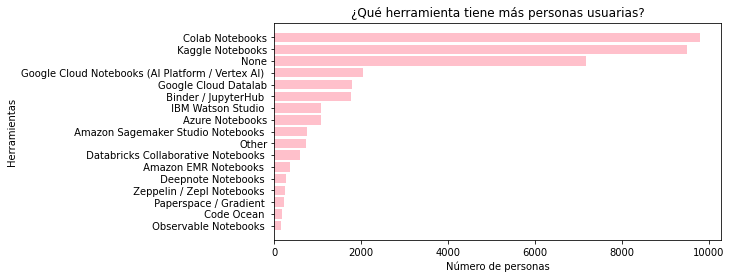

In [27]:
plt.figure(figsize = (10, 10))

fig,ax = plt.subplots(figsize= (8,4))

plt.barh(y = personas_herramienta[0], width = personas_herramienta[1], color ='pink')
plt.title('¿Qué herramienta tiene más personas usuarias?')

ax.set_ylabel('Herramientas')
#ax.set_xticklabels(labels = nombres_col, rotation = 330)
ax.set_xlabel('Número de personas')

plt.show()
